# Group 15-Air Pollution dataset

# 1. Data Collection

# Importing libraries

In [1140]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1141]:
#Importing .csv file
df= pd.read_csv('Air_Pollution_data.csv')
df1=df

In [1142]:
df.head()

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,Poor
1,Ahmedabad,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,Very Poor
2,Ahmedabad,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,Severe
3,Ahmedabad,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,Severe
4,Ahmedabad,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,Severe


## The data set is Collected and read to Python.

# 2.Preprocessing

# 2.1 Encoding

# Ordinal Encoding

In [1089]:
df['AQI_Bucket'].value_counts()

Satisfactory    636
Moderate        608
Severe          544
Poor            310
Very Poor       253
Good            148
Name: AQI_Bucket, dtype: int64

In [1090]:
scale_mapper = {'Good':6,'Satisfactory':5,'Moderate':4,'Poor':3,'Very Poor':2,'Severe':1}
df['AQI_Bucket'] = df['AQI_Bucket'].replace(scale_mapper)

In [1091]:
df.head()

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,3
1,Ahmedabad,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,2
2,Ahmedabad,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,1
3,Ahmedabad,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,1
4,Ahmedabad,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,1


# Insight
 ## we do ordinal encording so as to get a finite set of discrete values with a ranked ordering between values.

# One Hot Encoding

In [1092]:
df.City.nunique()

3

In [1093]:
df=pd.get_dummies(df)

In [1094]:
df.head()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209,3,1,0,0
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328,2,1,0,0
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514,1,1,0,0
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782,1,1,0,0
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914,1,1,0,0


# Insight
## For categorical variables where no ordinal relationship exists we use One hot encoding and one new binary variable is added for each unique integer value in the variable.

# 2.2 Missing value handling

In [1095]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           2498 non-null   float64
 1   NO              2499 non-null   float64
 2   NO2             2499 non-null   float64
 3   NOx             2498 non-null   float64
 4   CO              2497 non-null   float64
 5   SO2             2482 non-null   float64
 6   O3              2475 non-null   float64
 7   Benzene         2498 non-null   float64
 8   Toluene         2498 non-null   float64
 9   Xylene          2413 non-null   float64
 10  AQI             2499 non-null   int64  
 11  AQI_Bucket      2499 non-null   int64  
 12  City_Ahmedabad  2499 non-null   uint8  
 13  City_Amaravati  2499 non-null   uint8  
 14  City_Amritsar   2499 non-null   uint8  
dtypes: float64(10), int64(2), uint8(3)
memory usage: 241.7 KB


In [1096]:
df.isna().sum()

PM2.5              1
NO                 0
NO2                0
NOx                1
CO                 2
SO2               17
O3                24
Benzene            1
Toluene            1
Xylene            86
AQI                0
AQI_Bucket         0
City_Ahmedabad     0
City_Amaravati     0
City_Amritsar      0
dtype: int64

In [1097]:
df.shape

(2499, 15)

In [1098]:
df.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar
count,2498.000000,2499.000000,2499.000000,2498.000000,2497.000000,2482.000000,2475.000000,2498.000000,2498.000000,2413.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,57.310997,16.235266,38.625854,35.231009,10.102519,32.107808,35.001139,3.746341,15.627706,4.010825,265.727491,3.393357,0.464986,0.291317,0.243697
std,36.386025,16.615208,37.896668,28.036453,16.216755,34.632183,20.144132,5.255750,22.264436,5.570038,260.501571,1.616361,0.498872,0.454460,0.429398
min,3.040000,0.060000,0.080000,0.860000,0.000000,0.520000,0.380000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,30.862500,4.780000,11.825000,16.240000,0.590000,9.762500,20.900000,0.290000,1.160000,0.180000,87.000000,2.000000,0.000000,0.000000,0.000000
50%,48.385000,11.110000,22.130000,26.670000,1.100000,16.305000,31.670000,2.025000,3.840000,1.960000,170.000000,4.000000,0.000000,0.000000,0.000000
75%,77.330000,20.845000,54.325000,47.550000,14.070000,43.342500,45.105000,4.527500,28.507500,6.930000,351.500000,5.000000,1.000000,1.000000,0.000000
max,249.100000,108.990000,203.410000,166.230000,108.990000,167.130000,133.140000,49.700000,143.010000,49.930000,1577.000000,6.000000,1.000000,1.000000,1.000000


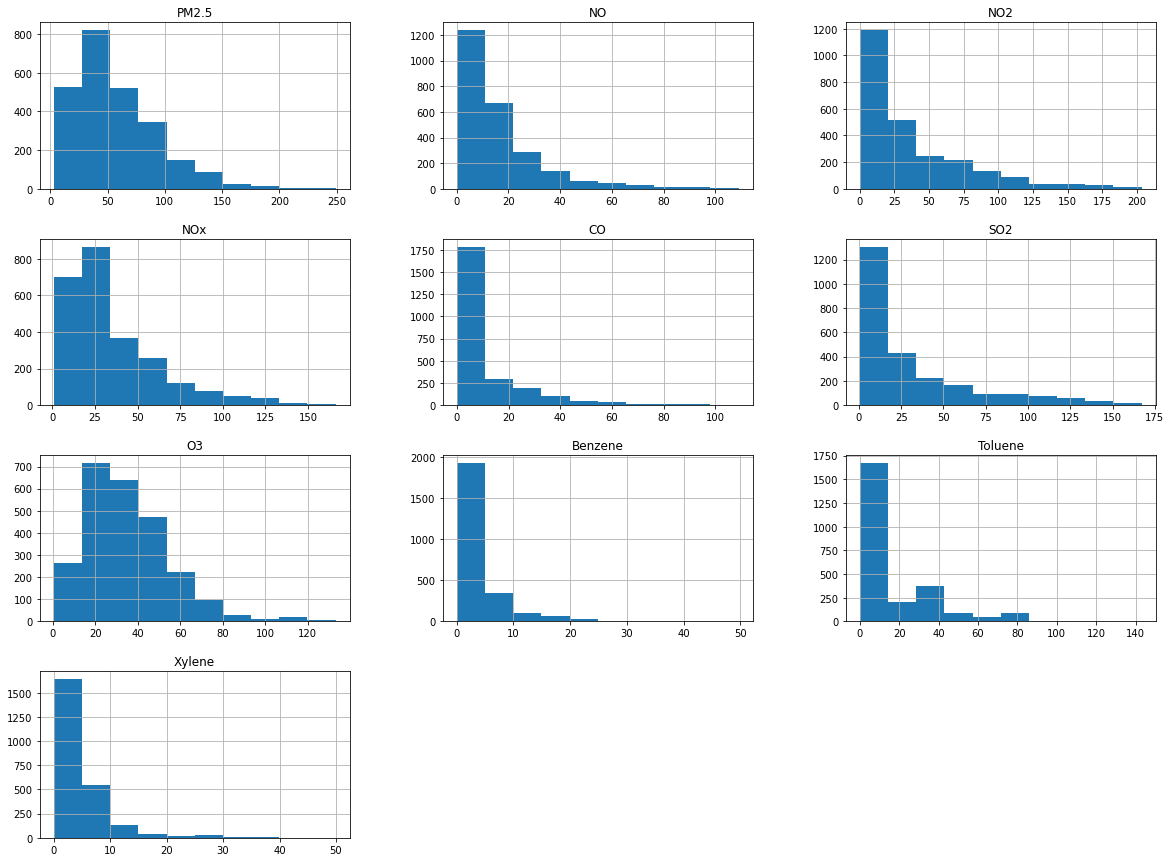

In [1099]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Insight 
## All the data following right skewed distribution.

In [1100]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar'],
      dtype='object')

In [1101]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [1102]:
df.isna().sum()

PM2.5             0
NO                0
NO2               0
NOx               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
City_Ahmedabad    0
City_Amaravati    0
City_Amritsar     0
dtype: int64

# Insight
## The missing values are handled using KNNImputer

# 2.3 Outlier detection and handling

{'whiskers': [<matplotlib.lines.Line2D at 0x19fe0c42af0>,
 'caps': [<matplotlib.lines.Line2D at 0x19fe05911f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fe0c42790>,
 'medians': [<matplotlib.lines.Line2D at 0x19fe05918b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19fe0591c10>,
 'means': []}

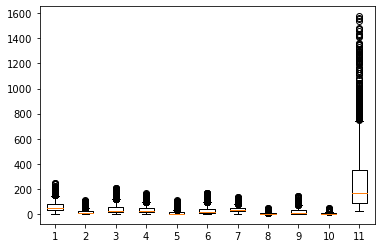

In [1103]:
plt.boxplot(df[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI']])

# Insight
## outlier removal not possible because of heavy data loss.

# 2.4 Feature engineering

In [1104]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar'],
      dtype='object')

In [1105]:
df['mean_nox']=df[['NO', 'NO2', 'NOx']].mean(axis=1)
df['sum_nox']=df[['NO', 'NO2', 'NOx']].sum(axis=1)
df['skew_nox']=df[['NO', 'NO2', 'NOx']].skew(axis=1)

# Insight
## 3 new features are added mean_nox, sum_nox and skew_nox.

# 2.5 Feature reduction

<AxesSubplot:>

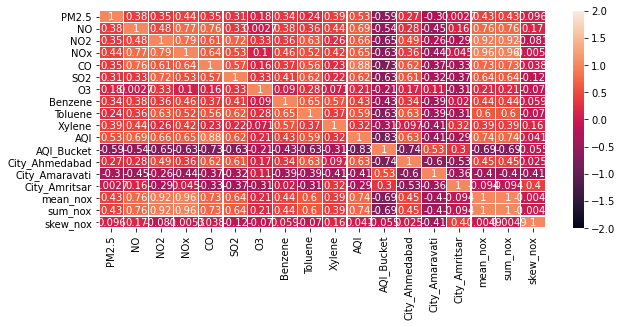

In [1106]:
corrvalue = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrvalue,vmin=-2,vmax=2,annot=True,linewidth=0.2)

# Insight
## mean_nox and sum_nox has high correlation with NOx hence we remove them

In [1107]:
df.drop(['mean_nox','sum_nox'],axis=1,inplace=True)

In [1108]:
df.head()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Ahmedabad,City_Amaravati,City_Amritsar,skew_nox
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,3.14,209.0,3.0,1.0,0.0,0.0,-1.494086
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,4.81,328.0,2.0,1.0,0.0,0.0,-0.266421
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,7.67,514.0,1.0,1.0,0.0,0.0,1.120691
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,25.87,782.0,1.0,1.0,0.0,0.0,1.725498
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,35.61,914.0,1.0,1.0,0.0,0.0,-0.080786


# Splitting the data

In [1109]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'Xylene', 'AQI', 'AQI_Bucket', 'City_Ahmedabad', 'City_Amaravati',
       'City_Amritsar', 'skew_nox'],
      dtype='object')

In [1110]:
x=df.drop(['AQI_Bucket'],axis=1)
y=df['AQI_Bucket']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 2.6 Standardisation/Normalization

# Scaling using MinMax Scaler

In [1111]:
#from sklearn import preprocessing
#min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
#x_test= min_max.fit_transform(x_test)
#x_train= min_max.fit_transform(x_train)
#x_train=pd.DataFrame(x_train)
#x_test=pd.DataFrame(x_test)

# Scaling using Standard Scaler

In [1112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:] = sc.fit_transform(x_train[:])
x_test[:] = sc.transform(x_test[:])

<ipython-input-1112-9075d0ea7b6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[:] = sc.fit_transform(x_train[:])
C:\Users\NJ\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\NJ\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

# 3. Exploratory Data Analysis (EDA)

Text(0, 0.5, 'AQI rating count')

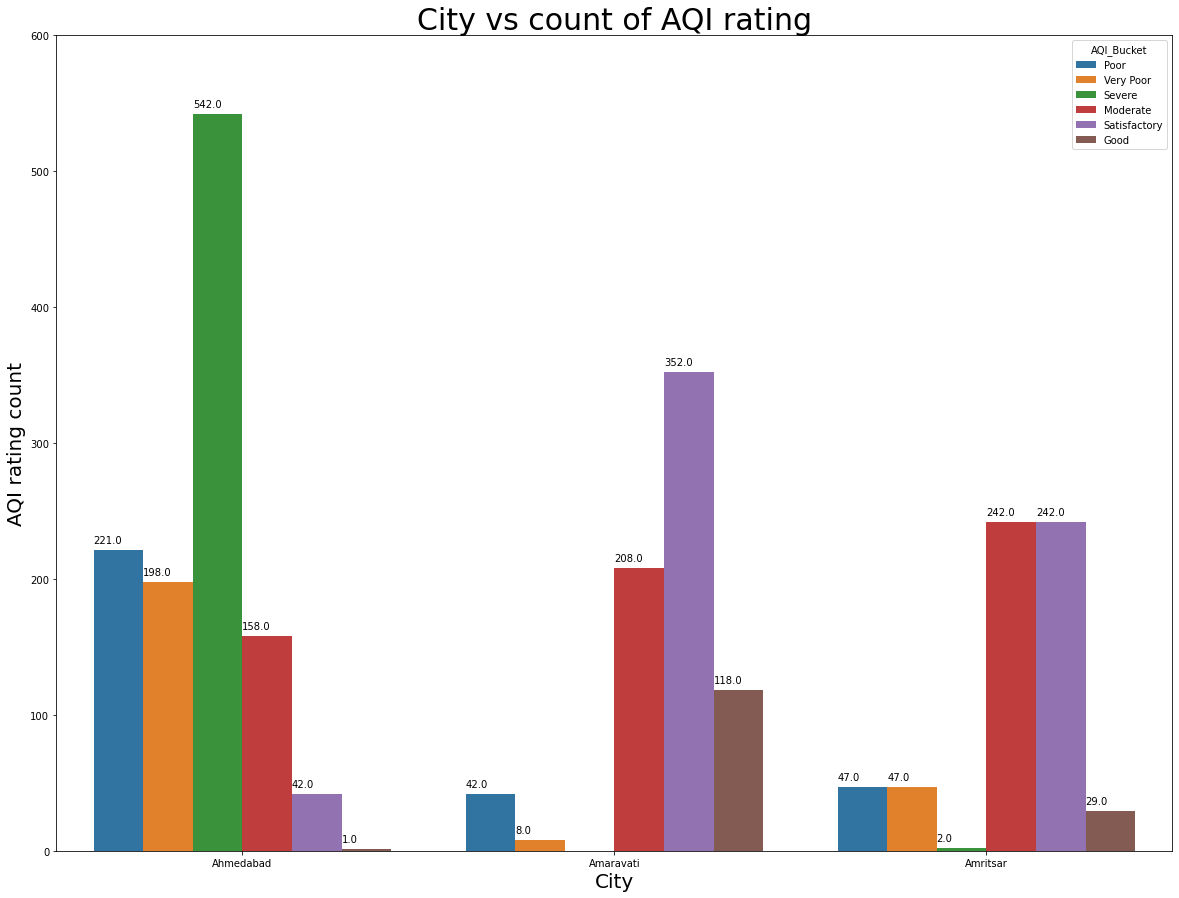

In [1139]:
plt.figure(figsize=(20,15))
plt.ylim(0,600)
plt.xlabel("City",fontsize=20)
graph=sns.countplot(x='City',data=df1,hue="AQI_Bucket")
plt.title('City vs count of AQI rating',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.ylabel("AQI rating count",fontsize=20)

# Insight
## Amarvati is found to show more entries of good and satisfactory AQI  where as Ahmeadabad is is found to have more number of very severe Air Quality. Hence we can say that Amarvati has cleaner air than the other two places. 

Text(0.5, 1.0, 'NOx vs NO2')

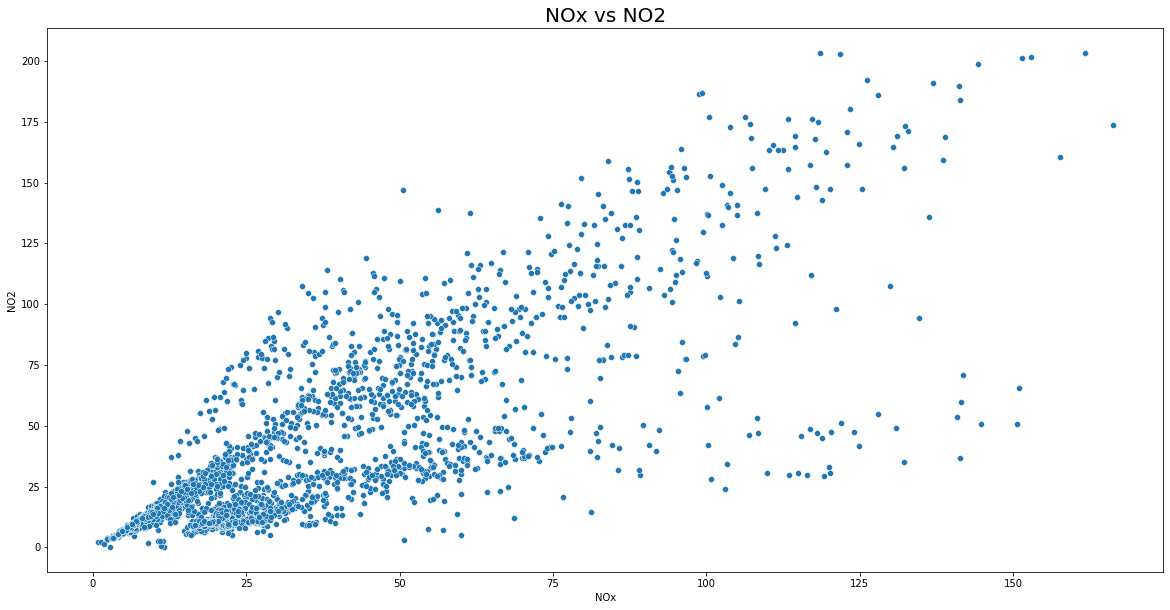

In [1121]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='NOx',y='NO2',data=df1)
plt.title('NOx vs NO2',size=20)

# Insight
## NO2 and NOx is found to show some close relation in the lower range while as the value increase they seem to spread out.

<AxesSubplot:>

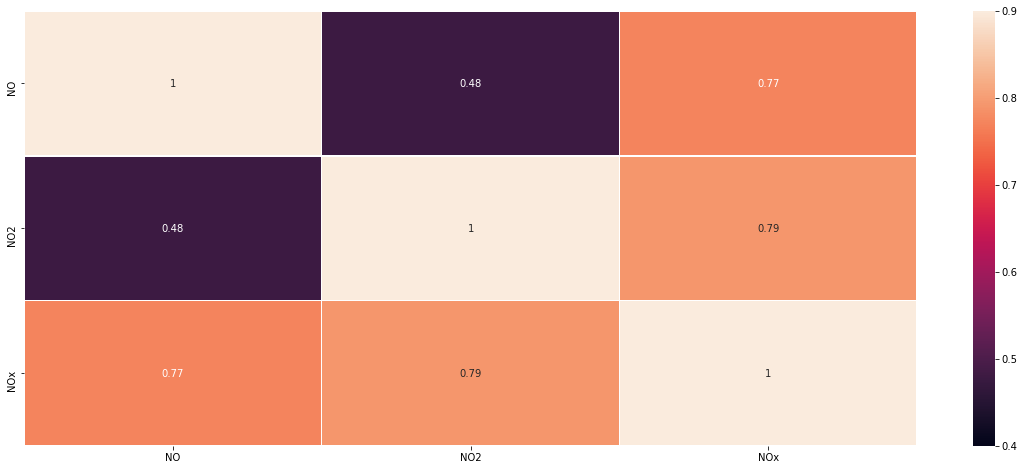

In [1125]:
corrmatrix=df1[['NO','NO2','NOx']].corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=.4,vmax=.9,annot=True,linewidth=0.3)

# Insight
## NO and NO2 are found to show good correlation with NOx (.77 and .79 Respectively)

# 4. Modeling


In [1051]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

# 4.1. Building the model using RandomForestClassifier

In [1052]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1053]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.994
Precision is: 0.9940228702115493
Recall is: 0.994
F1 Score is: 0.9939948633801812


In [1054]:
confusion_matrix(y_test,y_pred)

array([[108,   0,   0,   0,   0,   0],
       [  0,  52,   2,   0,   0,   0],
       [  0,   1,  64,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0],
       [  0,   0,   0,   0, 131,   0],
       [  0,   0,   0,   0,   0,  29]], dtype=int64)

# 4.2 Building the model using Gradient Boosting

# 4.2.1 Gradient Boosting

In [1055]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [1056]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [1057]:
confusion_matrix(y_test,y_predict)

array([[108,   0,   0,   0,   0,   0],
       [  0,  54,   0,   0,   0,   0],
       [  0,   0,  65,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0],
       [  0,   0,   0,   0, 131,   0],
       [  0,   0,   0,   0,   0,  29]], dtype=int64)

# 4.2.2 Extreme Gradient Boosting

In [1058]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_predd=xgb.predict(x_test)

C:\Users\NJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1059]:
print("Accuracy is:",accuracy_score(y_test,y_predd))
print("Precision is:",precision_score(y_test,y_predd,average='weighted'))
print("Recall is:",recall_score(y_test,y_predd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predd,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [1060]:
confusion_matrix(y_test,y_predd)

array([[108,   0,   0,   0,   0,   0],
       [  0,  54,   0,   0,   0,   0],
       [  0,   0,  65,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0],
       [  0,   0,   0,   0, 131,   0],
       [  0,   0,   0,   0,   0,  29]], dtype=int64)

# 4.3 Building the model using Logistic regression

In [1061]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

C:\Users\NJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1062]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 0.836
Precision is: 0.8329654706199293
Recall is: 0.836
F1 Score is: 0.8322093951984578


In [1063]:
confusion_matrix(y_test,y_preddd)

array([[106,   2,   0,   0,   0,   0],
       [  1,  43,  10,   0,   0,   0],
       [  0,   6,  50,   9,   0,   0],
       [  0,   0,   2,  96,  14,   1],
       [  0,   0,   0,  13, 112,   6],
       [  0,   0,   0,   0,  18,  11]], dtype=int64)

# 4.4 Building the model using KNN Model

In [1064]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)

In [1065]:
acc_values

[0.752,
 0.74,
 0.748,
 0.754,
 0.758,
 0.768,
 0.76,
 0.758,
 0.758,
 0.744,
 0.74,
 0.734]

Text(0, 0.5, 'accuracy')

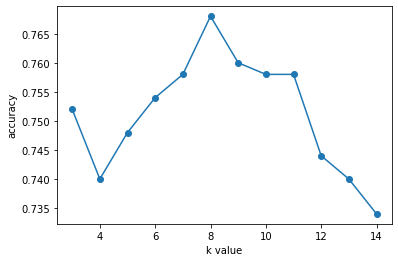

In [1066]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [1084]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [1085]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 0.768
Precision is: 0.7633545867683775
Recall is: 0.768
F1 Score is: 0.7634492606915368


In [1069]:
confusion_matrix(y_test,y_predic)

array([[103,   4,   1,   0,   0,   0],
       [ 14,  22,  15,   3,   0,   0],
       [  2,  11,  39,  13,   0,   0],
       [  0,   3,   7,  80,  22,   1],
       [  0,   0,   0,  19, 105,   7],
       [  0,   0,   0,   0,  11,  18]], dtype=int64)

# 4.5 Building the model using Decision Tree Model

In [1070]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [1071]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [1072]:
confusion_matrix(y_test,y_pr)

array([[108,   0,   0,   0,   0,   0],
       [  0,  54,   0,   0,   0,   0],
       [  0,   0,  65,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0],
       [  0,   0,   0,   0, 131,   0],
       [  0,   0,   0,   0,   0,  29]], dtype=int64)

# 4.6 Building the model using SVM Model

In [1073]:
from sklearn.svm import SVC

# 4.6.1 Linear SVM

In [1074]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [1075]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.924
Precision is: 0.9252257632530714
Recall is: 0.924
F1 Score is: 0.9235549573942179


In [1076]:
confusion_matrix(y_test,y_pre)

array([[106,   2,   0,   0,   0,   0],
       [  1,  52,   1,   0,   0,   0],
       [  0,   3,  60,   2,   0,   0],
       [  0,   0,   2, 100,  11,   0],
       [  0,   0,   0,   5, 123,   3],
       [  0,   0,   0,   0,   8,  21]], dtype=int64)

# 4.6.2 Polynomial SVM

In [1077]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pre1=svm_poly.predict(x_test)

In [1078]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.714
Precision is: 0.685399614450002
Recall is: 0.714
F1 Score is: 0.6948951726216458


C:\Users\NJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1079]:
confusion_matrix(y_test,y_pre1)

array([[ 93,   8,   7,   0,   0,   0],
       [  2,  27,  23,   2,   0,   0],
       [  0,   7,  38,  20,   0,   0],
       [  0,   0,  12,  85,  16,   0],
       [  0,   0,   0,  17, 114,   0],
       [  0,   0,   0,   0,  29,   0]], dtype=int64)

# 4.6.3 Radial SVM

In [1080]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pre2=svm_rad.predict(x_test)

In [1081]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 0.79
Precision is: 0.7484193139615228
Recall is: 0.79
F1 Score is: 0.765807609874668


C:\Users\NJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1082]:
confusion_matrix(y_test,y_pre2)

array([[104,   4,   0,   0,   0,   0],
       [  6,  35,  13,   0,   0,   0],
       [  0,   8,  50,   7,   0,   0],
       [  1,   2,   5,  87,  18,   0],
       [  0,   0,   0,  12, 119,   0],
       [  0,   0,   0,   0,  29,   0]], dtype=int64)

# Insight

### The Gradient boosting ,Extreme gradient boosting and Decision tree model has the highest vaules.
    Accuracy is: 1
    Precision is: 1
    Recall is: 1
    F1 Score is: 1

# 5. Model Tuning